In [116]:
import pandas as pd
import numpy as np

In [117]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [118]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


###### Checando posições NCM recorrentes

Por meio do Jupyer Notebook "03_análises_diversas_e_representações_gráficas - PARTE 01", constata-se que a maior quantidade de mercadoria importada classifica-se na posição 8532. De todo modo, para fins de implementação do modelo, entende-se que é desejável não apenas um código que tenha sido importado em quantidade, mas, sobretudo, que tenha sido recorrente. Segue, portanto, consulta à posição da NCM em que os códigos NCM foram mais recorrentes.

In [119]:
# testa capítulos mais recorrentes
df["POSIÇÃO_NCM"] = df["CO_NCM"].astype(str).str[:4]

In [120]:
df["POSIÇÃO_NCM"].value_counts()

8708    51461
8536    43444
8481    36563
8483    35341
7318    34623
        ...  
3063        1
3051        1
8059        1
3024        1
2081        1
Name: POSIÇÃO_NCM, Length: 1263, dtype: int64

In [121]:
# uma vez constatado que a posição 8708 é a mais recorrente, tentaremos reproduzir o modelo no âmbito dessa posição.
df1=df[df["POSIÇÃO_NCM"]=="8708"]

In [122]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,POSIÇÃO_NCM
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725,8708
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,3.741055,3.884405,8708
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,3.741055,3.884405,8708
61,2019-01,87083019,11,23,SP,1,817800,4653,17020,183130,3.741055,3.884405,8708
76,2019-11,87089411,11,386,SC,1,927800,4,3,440,4.154725,4.086387,8708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764131,2019-08,87087090,11,249,MG,4,717700,1,13,1000,4.019382,3.778713,8708
1764280,2019-08,87083090,11,105,SP,7,1017503,11,24,884,4.019382,3.778713,8708
1764353,2019-08,87082913,11,247,SP,4,817700,1,23,407,4.019382,3.778713,8708
1764406,2019-08,87089300,11,149,SP,4,817600,8,5,150,4.019382,3.778713,8708


In [123]:
df1["CO_UNID"].value_counts()

11    40809
10    10652
Name: CO_UNID, dtype: int64

In [9]:
df1.drop(columns="POSIÇÃO_NCM", inplace=True)

D:\ANACONDA\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,3.741055,3.884405
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,3.741055,3.884405
61,2019-01,87083019,11,23,SP,1,817800,4653,17020,183130,3.741055,3.884405
76,2019-11,87089411,11,386,SC,1,927800,4,3,440,4.154725,4.086387
...,...,...,...,...,...,...,...,...,...,...,...,...
1764131,2019-08,87087090,11,249,MG,4,717700,1,13,1000,4.019382,3.778713
1764280,2019-08,87083090,11,105,SP,7,1017503,11,24,884,4.019382,3.778713
1764353,2019-08,87082913,11,247,SP,4,817700,1,23,407,4.019382,3.778713
1764406,2019-08,87089300,11,149,SP,4,817600,8,5,150,4.019382,3.778713


In [11]:
# checando quais os códigos NCM mais recorrentes
g1=df1.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
44,87089990,6113
12,87082999,5172
15,87083090,3375
28,87088000,3186
25,87085099,2477
29,87089100,2446
19,87084090,2263
0,87081000,2254
31,87089300,2072
30,87089200,1962


In [12]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [13]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [14]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [15]:
g2.head()

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
44,87089990,6113,0.118789,0.118789
12,87082999,5172,0.100503,0.219292
15,87083090,3375,0.065584,0.284876
28,87088000,3186,0.061911,0.346787
25,87085099,2477,0.048134,0.394920


In [16]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restingem a 30 códigos NCM dentre os 45.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 44 to 2
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CO_NCM           30 non-null     int64  
 1   contagem         30 non-null     int64  
 2   % CO_NCM         30 non-null     float64
 3   % CO_NCM ACUMUL  30 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.2 KB


In [17]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
5,87082914,333,0.006471,0.951750
3,87082912,306,0.005946,0.957696
13,87083011,299,0.005810,0.963506
32,87089411,268,0.005208,0.968714
33,87089412,257,0.004994,0.973708
43,87089910,236,0.004586,0.978294
24,87085091,212,0.004120,0.982414
41,87089522,205,0.003984,0.986397
40,87089521,203,0.003945,0.990342
21,87085012,125,0.002429,0.992771


In [18]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [19]:
mask=df1['CO_NCM'].isin(idx)
mask

16         False
42         False
54         False
61         False
76          True
           ...  
1764131    False
1764280    False
1764353     True
1764406    False
1764415     True
Name: CO_NCM, Length: 51461, dtype: bool

In [20]:
df1["CO_NCM_final"]=df1["CO_NCM"]

<ipython-input-20-e6965bd59fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_NCM_final"]=df1["CO_NCM"]


In [21]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df1.loc[mask, "CO_NCM_final"] = 99999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [22]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725,87087090
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,3.741055,3.884405,87083090
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,3.741055,3.884405,87082999
61,2019-01,87083019,11,23,SP,1,817800,4653,17020,183130,3.741055,3.884405,87083019
76,2019-11,87089411,11,386,SC,1,927800,4,3,440,4.154725,4.086387,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764131,2019-08,87087090,11,249,MG,4,717700,1,13,1000,4.019382,3.778713,87087090
1764280,2019-08,87083090,11,105,SP,7,1017503,11,24,884,4.019382,3.778713,87083090
1764353,2019-08,87082913,11,247,SP,4,817700,1,23,407,4.019382,3.778713,99999999
1764406,2019-08,87089300,11,149,SP,4,817600,8,5,150,4.019382,3.778713,87089300


In [23]:
df1["CO_NCM_final"].value_counts()

87089990    6113
87082999    5172
87083090    3375
87088000    3186
99999999    2816
87085099    2477
87089100    2446
87084090    2263
87081000    2254
87089300    2072
87089200    1962
87087090    1868
87089490    1826
87082919    1390
87082100    1115
87082991    1093
87085080    1032
87082992     932
87083019     930
87082993     904
87084080     762
87089482     760
87089510     747
87089483     692
87089481     681
87082994     646
87089529     438
87085019     430
87084019     368
87087010     364
87082911     347
Name: CO_NCM_final, dtype: int64

###### Checando códigos UNID MED EST (CO_UNID) recorrentes

In [24]:
g1=df1.groupby(['CO_UNID']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_UNID,contagem
1,11,40809
0,10,10652


In [25]:
df1["CO_UNID_final"]=df1["CO_UNID"]

<ipython-input-25-043d6a9cfec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_UNID_final"]=df1["CO_UNID"]


In [26]:
# no caso corrente não há CO_UNID minoritários para serem agrupados em categorial residual. Portanto, não se executará o código a seguir.
#mask=df1['CO_UNID']!=11
#mask

In [27]:
#df1.loc[mask, "CO_UNID_final"] = 99

In [28]:
df1["CO_UNID_final"].value_counts()

11    40809
10    10652
Name: CO_UNID_final, dtype: int64

###### Checando países (CO_PAIS) recorrentes

In [29]:
g1=df1.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
16,160,5124
29,249,4835
2,23,4088
45,386,3051
59,493,2982
...,...,...
37,329,1
38,345,1
47,403,1
62,507,1


In [30]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [31]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [32]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [33]:
g2.head()

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
16,160,5124,0.099571,0.099571
29,249,4835,0.093955,0.193525
2,23,4088,0.079439,0.272964
45,386,3051,0.059288,0.332252
59,493,2982,0.057947,0.390198


In [34]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_PAIS, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restingem a 32 países dentre os 99.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 16 to 39
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           32 non-null     int64  
 1   contagem          32 non-null     int64  
 2   % CO_PAIS         32 non-null     float64
 3   % CO_PAIS ACUMUL  32 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.2 KB


In [35]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
23,232,205,0.003984,0.951944
64,538,202,0.003925,0.955869
54,455,192,0.003731,0.959600
13,111,154,0.002993,0.962593
30,251,144,0.002798,0.965391
...,...,...,...,...
37,329,1,0.000019,0.999922
38,345,1,0.000019,0.999942
47,403,1,0.000019,0.999961
62,507,1,0.000019,0.999981


In [36]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [37]:
mask=df1['CO_PAIS'].isin(idx)
mask

16         False
42         False
54         False
61         False
76         False
           ...  
1764131    False
1764280    False
1764353    False
1764406    False
1764415    False
Name: CO_PAIS, Length: 51461, dtype: bool

In [38]:
df1["CO_PAIS_final"]=df1["CO_PAIS"]

<ipython-input-38-b9c243d6eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_PAIS_final"]=df1["CO_PAIS"]


In [39]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df1.loc[mask, "CO_PAIS_final"] = 999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [40]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725,87087090,11,249
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,3.741055,3.884405,87083090,11,245
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,3.741055,3.884405,87082999,11,399
61,2019-01,87083019,11,23,SP,1,817800,4653,17020,183130,3.741055,3.884405,87083019,11,23
76,2019-11,87089411,11,386,SC,1,927800,4,3,440,4.154725,4.086387,99999999,11,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764131,2019-08,87087090,11,249,MG,4,717700,1,13,1000,4.019382,3.778713,87087090,11,249
1764280,2019-08,87083090,11,105,SP,7,1017503,11,24,884,4.019382,3.778713,87083090,11,105
1764353,2019-08,87082913,11,247,SP,4,817700,1,23,407,4.019382,3.778713,99999999,11,247
1764406,2019-08,87089300,11,149,SP,4,817600,8,5,150,4.019382,3.778713,87089300,11,149


In [41]:
df1["CO_PAIS_final"].value_counts()

160    5124
249    4835
23     4088
386    3051
493    2982
999    2678
275    2274
399    2093
190    1700
361    1643
63     1630
603    1528
245    1485
764    1475
776    1371
628    1363
791    1298
161    1235
827    1212
355    1021
149     977
247     958
670     834
87      696
72      646
573     549
105     534
607     507
767     490
271     419
756     277
246     263
351     225
Name: CO_PAIS_final, dtype: int64

###### Checando países (SG_UF_NCM) recorrentes

In [42]:
g1=df1.groupby(['SG_UF_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,SG_UF_NCM,contagem
22,SP,19581
15,PR,5943
20,SC,5899
16,RJ,4664
19,RS,4060
9,MG,3758
3,BA,3059
7,GO,1725
14,PE,662
12,PA,402


In [43]:
g1["% SG_UF_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [44]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [45]:
g2["% SG_UF_NCM ACUMUL"]=g2["% SG_UF_NCM"].cumsum()

In [46]:
g2.head()

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
22,SP,19581,0.380502,0.380502
15,PR,5943,0.115486,0.495987
20,SC,5899,0.114630,0.610618
16,RJ,4664,0.090632,0.701249
19,RS,4060,0.078895,0.780144


In [47]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% SG_UF_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 8 UF dentre as 27.

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
22,SP,19581,0.380502,0.380502
15,PR,5943,0.115486,0.495987
20,SC,5899,0.114630,0.610618
16,RJ,4664,0.090632,0.701249
19,RS,4060,0.078895,0.780144
9,MG,3758,0.073026,0.853170
3,BA,3059,0.059443,0.912613
7,GO,1725,0.033521,0.946134


In [48]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% SG_UF_NCM ACUMUL"]>0.95]
g4

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
14,PE,662,0.012864,0.958998
12,PA,402,0.007812,0.966810
1,AM,396,0.007695,0.974505
4,CE,282,0.005480,0.979985
18,RO,280,0.005441,0.985426
0,AL,269,0.005227,0.990653
10,MS,165,0.003206,0.993859
6,ES,159,0.003090,0.996949
11,MT,67,0.001302,0.998251
21,SE,49,0.000952,0.999203


In [49]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["SG_UF_NCM"]

In [50]:
mask=df1['SG_UF_NCM'].isin(idx)
mask

16         False
42         False
54         False
61         False
76         False
           ...  
1764131    False
1764280    False
1764353    False
1764406    False
1764415    False
Name: SG_UF_NCM, Length: 51461, dtype: bool

In [51]:
df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]

<ipython-input-51-dd95862fade3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]


In [52]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df1.loc[mask, "SG_UF_NCM_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [53]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final,SG_UF_NCM_final
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,4.108924,4.154725,87087090,11,249,SC
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,3.741055,3.884405,87083090,11,245,SP
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,3.741055,3.884405,87082999,11,399,SP
61,2019-01,87083019,11,23,SP,1,817800,4653,17020,183130,3.741055,3.884405,87083019,11,23,SP
76,2019-11,87089411,11,386,SC,1,927800,4,3,440,4.154725,4.086387,99999999,11,386,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764131,2019-08,87087090,11,249,MG,4,717700,1,13,1000,4.019382,3.778713,87087090,11,249,MG
1764280,2019-08,87083090,11,105,SP,7,1017503,11,24,884,4.019382,3.778713,87083090,11,105,SP
1764353,2019-08,87082913,11,247,SP,4,817700,1,23,407,4.019382,3.778713,99999999,11,247,SP
1764406,2019-08,87089300,11,149,SP,4,817600,8,5,150,4.019382,3.778713,87089300,11,149,SP


In [54]:
df1["SG_UF_NCM_final"].value_counts()

SP    19581
PR     5943
SC     5899
RJ     4664
RS     4060
MG     3758
BA     3059
99     2772
GO     1725
Name: SG_UF_NCM_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [55]:
g1=df1.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
1,1,31549
2,4,17684
4,7,1948
0,0,264
5,10,13
3,5,3


In [56]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [57]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [58]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [59]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
1,1,31549,0.613066,0.613066
2,4,17684,0.343639,0.956705
4,7,1948,0.037854,0.994559
0,0,264,0.005130,0.999689
5,10,13,0.000253,0.999942
3,5,3,0.000058,1.000000


In [60]:
df1["CO_VIA_final"]=df["CO_VIA"]

<ipython-input-60-0653cde63ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_VIA_final"]=df["CO_VIA"]


In [61]:
mask=(df1['CO_VIA']!=1) & (df['CO_VIA']!=4) & (df['CO_VIA']!=7)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
1764428    False
1764429    False
1764430    False
1764431    False
1764432    False
Name: CO_VIA, Length: 1764433, dtype: bool

In [62]:
df1.loc[mask, "CO_VIA_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [63]:
df1["CO_VIA_final"].value_counts()

1     31549
4     17684
7      1948
99      280
Name: CO_VIA_final, dtype: int64

###### Não será levada em conta - inicialmente - a feature CO_URF, uma vez que essa está associada à SG_UF_NCM (que será "dummizada"). Posteriormente, pode-se substituir uma pela outra para ver se o modelo melhora.

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/QT_ESTAT)

In [64]:
df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]

<ipython-input-64-0725dfbab52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]


In [65]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final', 'VL_FOB/QT_ESTAT'],
      dtype='object')

In [66]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,...,0,0,0,0,0,0,0,0,0,1
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,...,0,0,0,0,0,0,0,0,0,0
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_87089200,NCM_87089300,NCM_87089481,NCM_87089482,NCM_87089483,NCM_87089490,NCM_87089510,NCM_87089529,NCM_87089990,NCM_99999999
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,...,0,0,0,0,0,0,0,0,0,0
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,...,0,0,0,0,0,0,0,0,0,0
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_87089481,NCM_87089482,NCM_87089483,NCM_87089490,NCM_87089510,NCM_87089529,NCM_87089990,NCM_99999999,Un.Med.Est._10,Un.Med.Est._11
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,...,0,0,0,0,0,0,0,0,0,1
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,...,0,0,0,0,0,0,0,0,0,1
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_607,Pais_628,Pais_670,Pais_756,Pais_764,Pais_767,Pais_776,Pais_791,Pais_827,Pais_999
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,...,0,0,0,0,0,0,0,0,0,0
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,...,0,0,0,0,0,0,0,0,0,0
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["SG_UF_NCM_final"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_999,UF_99,UF_BA,UF_GO,UF_MG,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,...,0,0,0,0,0,0,0,0,1,0
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,...,0,0,0,0,0,0,0,0,0,1
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,...,0,0,0,0,0,0,0,0,0,1


In [71]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_MG,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP,Modal_1,Modal_4,Modal_7,Modal_99
16,2019-12,87087090,11,249,SC,1,927700,5,50,1050,...,0,0,0,0,1,0,1,0,0,0
42,2019-01,87083090,11,245,SP,1,817800,383771,34665,167119,...,0,0,0,0,0,1,1,0,0,0
54,2019-01,87082999,11,399,SP,1,817800,4948557,316177,2209425,...,0,0,0,0,0,1,1,0,0,0


In [72]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'KG_LIQUIDO', 'VL_FOB', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final'])

In [73]:
df_encoded.columns

Index(['QT_ESTAT', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/QT_ESTAT', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06', 'Mês_2019-07',
       'Mês_2019-08', 'Mês_2019-09', 'Mês_2019-10', 'Mês_2019-11',
       'Mês_2019-12', 'NCM_87081000', 'NCM_87082100', 'NCM_87082911',
       'NCM_87082919', 'NCM_87082991', 'NCM_87082992', 'NCM_87082993',
       'NCM_87082994', 'NCM_87082999', 'NCM_87083019', 'NCM_87083090',
       'NCM_87084019', 'NCM_87084080', 'NCM_87084090', 'NCM_87085019',
       'NCM_87085080', 'NCM_87085099', 'NCM_87087010', 'NCM_87087090',
       'NCM_87088000', 'NCM_87089100', 'NCM_87089200', 'NCM_87089300',
       'NCM_87089481', 'NCM_87089482', 'NCM_87089483', 'NCM_87089490',
       'NCM_87089510', 'NCM_87089529', 'NCM_87089990', 'NCM_99999999',
       'Un.Med.Est._10', 'Un.Med.Est._11', 'Pais_23', 'Pais_63', 'Pais_72',
       'Pais_87', 'Pais_105', 'Pais_149', 'Pais_160', 'Pais_161', 'Pais_190',
       'Pais

In [74]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51461 entries, 16 to 1764415
Data columns (total 95 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QT_ESTAT             51461 non-null  int64  
 1   câmbio_mês_atual     51461 non-null  float64
 2   câmbio_mês_anterior  51461 non-null  float64
 3   VL_FOB/QT_ESTAT      51461 non-null  float64
 4   Mês_2019-01          51461 non-null  uint8  
 5   Mês_2019-02          51461 non-null  uint8  
 6   Mês_2019-03          51461 non-null  uint8  
 7   Mês_2019-04          51461 non-null  uint8  
 8   Mês_2019-05          51461 non-null  uint8  
 9   Mês_2019-06          51461 non-null  uint8  
 10  Mês_2019-07          51461 non-null  uint8  
 11  Mês_2019-08          51461 non-null  uint8  
 12  Mês_2019-09          51461 non-null  uint8  
 13  Mês_2019-10          51461 non-null  uint8  
 14  Mês_2019-11          51461 non-null  uint8  
 15  Mês_2019-12          51461 non-nu

In [75]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values(ascending=False)
correlacoes.head(20)

VL_FOB/QT_ESTAT    1.000000
Modal_99           0.105961
NCM_87084080       0.072650
Pais_249           0.055862
NCM_99999999       0.055247
NCM_87084019       0.050998
Un.Med.Est._11     0.025066
Un.Med.Est._10     0.025066
NCM_87085019       0.021108
UF_MG              0.020526
Modal_1            0.018403
NCM_87089990       0.017836
Pais_399           0.016604
NCM_87082999       0.016469
UF_SC              0.013027
Mês_2019-04        0.012627
Pais_160           0.012538
NCM_87085099       0.011509
NCM_87087010       0.010843
UF_BA              0.009821
Name: VL_FOB/QT_ESTAT, dtype: float64

In [76]:
# Identificando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
(correlacoes[correlacoes >= 0.01]).index

Index(['VL_FOB/QT_ESTAT', 'Modal_99', 'NCM_87084080', 'Pais_249',
       'NCM_99999999', 'NCM_87084019', 'Un.Med.Est._11', 'Un.Med.Est._10',
       'NCM_87085019', 'UF_MG', 'Modal_1', 'NCM_87089990', 'Pais_399',
       'NCM_87082999', 'UF_SC', 'Mês_2019-04', 'Pais_160', 'NCM_87085099',
       'NCM_87087010'],
      dtype='object')

In [77]:
# Selecionando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
df2 = df_encoded[(correlacoes[correlacoes >= 0.01]).index]

In [78]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

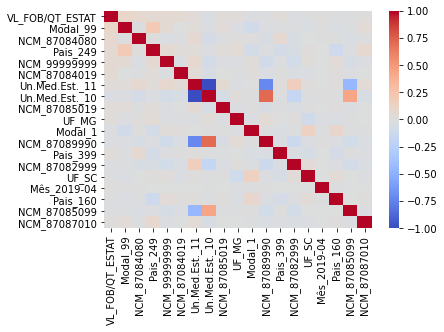

In [79]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False )

In [80]:
#Considerando que as Un.Med.Est._11 e Un.Med.Est._10 estão fortemente relacionadas, irei retirar uma delas antes da elaboração do modelo
df2=df2.drop(columns="Un.Med.Est._11")

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [81]:
df2.columns

Index(['VL_FOB/QT_ESTAT', 'Modal_99', 'NCM_87084080', 'Pais_249',
       'NCM_99999999', 'NCM_87084019', 'Un.Med.Est._10', 'NCM_87085019',
       'UF_MG', 'Modal_1', 'NCM_87089990', 'Pais_399', 'NCM_87082999', 'UF_SC',
       'Mês_2019-04', 'Pais_160', 'NCM_87085099', 'NCM_87087010'],
      dtype='object')

In [82]:
x = df2[['Modal_99', 'NCM_87084080', 'NCM_99999999',
       'NCM_87084019', 'Un.Med.Est._10', 'NCM_87085019', 'UF_MG', 'Modal_1',
       'NCM_87089990', 'NCM_87082999', 'UF_SC', 'Mês_2019-04', 'NCM_87085099',
       'NCM_87087010']]
y = df2['VL_FOB/QT_ESTAT']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()

In [87]:
lm.fit(x_train,y_train)

LinearRegression()

In [88]:
# impressão do intercepto
print(lm.intercept_)

118.50257273535418


In [89]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
Modal_99,4966.469848
NCM_87084080,2041.399975
NCM_99999999,802.227556
NCM_87084019,2132.494706
Un.Med.Est._10,-175.731830
NCM_87085019,756.844490
UF_MG,292.628214
Modal_1,-69.637422
NCM_87089990,85.750494
NCM_87082999,-90.399728


In [90]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [92]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [95]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root Mean squared error

In [96]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [97]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [98]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

1939.8826112843853

In [99]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

3761.9102023760097

In [100]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

3997.5284734160177

#### Mean absolute error

In [101]:
from sklearn.metrics import mean_absolute_error

In [102]:
erro_absoluto_LR=mean_absolute_error(y_test, predicoesLR)
erro_absoluto_LR

285.9074353398639

In [103]:
erro_absoluto_RFR=mean_absolute_error(y_test, predicoesRFR)
erro_absoluto_RFR

295.84771501564717

In [104]:
erro_absoluto_GBR=mean_absolute_error(y_test, predicoesGBR)
erro_absoluto_GBR

301.75458910544955

#### Mean squared error - MSE

In [105]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

3763144.5455635255

In [106]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

14151968.370740712

In [107]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

15980233.895771796

#### R2 Score

In [108]:
from sklearn.metrics import r2_score

In [109]:
R2_score_LR=r2_score(y_test, predicoesLR)
R2_score_LR

0.030979068317105618

In [114]:
R2_score_RFR=r2_score(y_test, predicoesRFR)
R2_score_RFR

-2.6441740171605423

In [115]:
R2_score_GBR=r2_score(y_test, predicoesGBR)
R2_score_GBR

-3.1149578366441597